<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/R/04_ADF_KPSS_TEST_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADF , KPSS

# 🇷 R in Google Colab — Starter Notebook

이 노트북은 **Colab에서 R 런타임(IRkernel)** 로 바로 실행되도록 메타데이터가 설정되어 있습니다.

## 사용법
1. Colab에서 열었을 때, 상단 메뉴에서 **Runtime → Change runtime type → Language: R** 인지 확인하세요.
2. 아래 셀부터 순서대로 실행하세요. 첫 셀은 필요한 패키지를 설치합니다.

---


In [1]:
# 설치: 필요한 패키지들 (최초 1회)
install.packages(
  c("ggplot2","forecast","urca","tseries","xts","quantmod"),
  repos = "https://cloud.r-project.org"
)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘zoo’, ‘RcppArmadillo’, ‘quadprog’, ‘TTR’




In [2]:
# 로드 & 기본 설정
suppressPackageStartupMessages({
  library(ggplot2)
  library(forecast)
  library(urca)
  library(tseries)
  library(xts)
  library(quantmod)
})
theme_set(theme_minimal(base_size = 12))
options(stringsAsFactors = FALSE)
message("Packages loaded.")


Packages loaded.



In [3]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)  # 가로x세로(인치), 해상도

## 1) 러닝 체크: 간단한 AR(1) 시뮬레이션 & 예측


Series: y 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.5544  0.0976
s.e.  0.0482  0.1247

sigma^2 = 0.9393:  log likelihood = -415.47
AIC=836.94   AICc=837.02   BIC=848.05

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE     MASE
Training set 0.005242192 0.9659473 0.7681547 -6.43051 200.1816 0.894467
                    ACF1
Training set -0.03460514


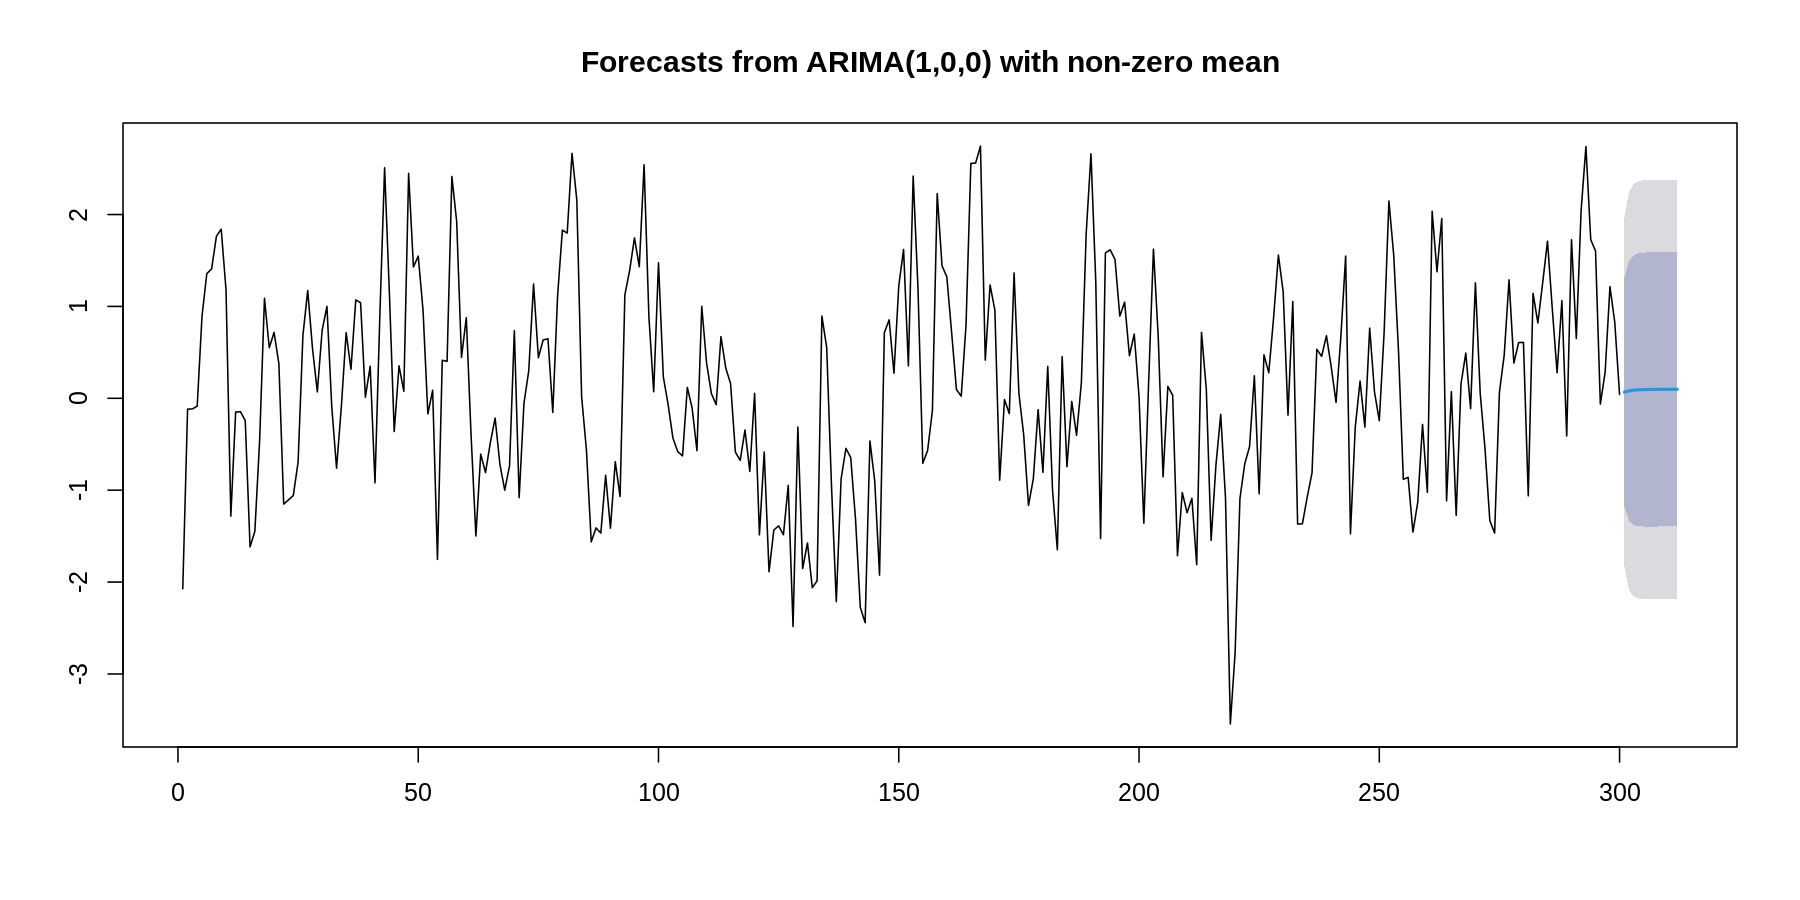

In [4]:
set.seed(1)
y <- arima.sim(list(ar = 0.6), n = 300)
fit <- forecast::Arima(y, order = c(1, 0, 0), method = "ML")
print(summary(fit))
plot(forecast::forecast(fit, h = 12))


## 2) 정상성 테스트: ADF & KPSS (시뮬레이션 데이터)


In [5]:
# ADF (augmented Dickey–Fuller)
adf1 <- urca::ur.df(y, type = "drift", lags = 3)
print(summary(adf1))
print(tseries::adf.test(y, k = 3))

# KPSS (Kwiatkowski–Phillips–Schmidt–Shin)
print(tseries::kpss.test(y, null = "Level"))

# 차분 후 재검정
dy <- diff(y)
print(tseries::adf.test(na.omit(dy), k = 3))
print(tseries::kpss.test(na.omit(dy), null = "Level"))



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.01588 -0.63432 -0.04973  0.62895  2.52375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05021    0.05693   0.882    0.379    
z.lag.1     -0.42818    0.06549  -6.538 2.79e-10 ***
z.diff.lag1 -0.04464    0.06911  -0.646    0.519    
z.diff.lag2  0.01820    0.06487   0.281    0.779    
z.diff.lag3 -0.00610    0.05831  -0.105    0.917    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9717 on 291 degrees of freedom
Multiple R-squared:  0.2251,	Adjusted R-squared:  0.2144 
F-statistic: 21.13 on 4 and 291 DF,  p-value: 2.61e-15


Value of test-statistic is: -6.538 21.3747 

Critical values for test statistics: 
      1pct 

Warning message in tseries::adf.test(y, k = 3):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -6.5273, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



Warning message in tseries::kpss.test(y, null = "Level"):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  y
KPSS Level = 0.12337, Truncation lag parameter = 5, p-value = 0.1



Warning message in tseries::adf.test(na.omit(dy), k = 3):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(dy)
Dickey-Fuller = -12.587, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



Warning message in tseries::kpss.test(na.omit(dy), null = "Level"):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  na.omit(dy)
KPSS Level = 0.022748, Truncation lag parameter = 5, p-value = 0.1



## 3) (선택) 야후 금융에서 TSLA 가져와 보기
Colab은 인터넷 연결이 가능하므로 다음과 같이 데이터를 불러올 수 있습니다.

[1] "TSLA"

Series: na.omit(ret) 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1     ma1     mean
      -0.7713  0.7194  -0.0957
s.e.   0.1355  0.1455   0.1647

sigma^2 = 14.48:  log likelihood = -1376.15
AIC=2760.29   AICc=2760.37   BIC=2777.15

Training set error measures:
                       ME     RMSE      MAE MPE MAPE      MASE       ACF1
Training set 0.0005990824 3.793688 2.865239 Inf  Inf 0.6758197 0.03168625


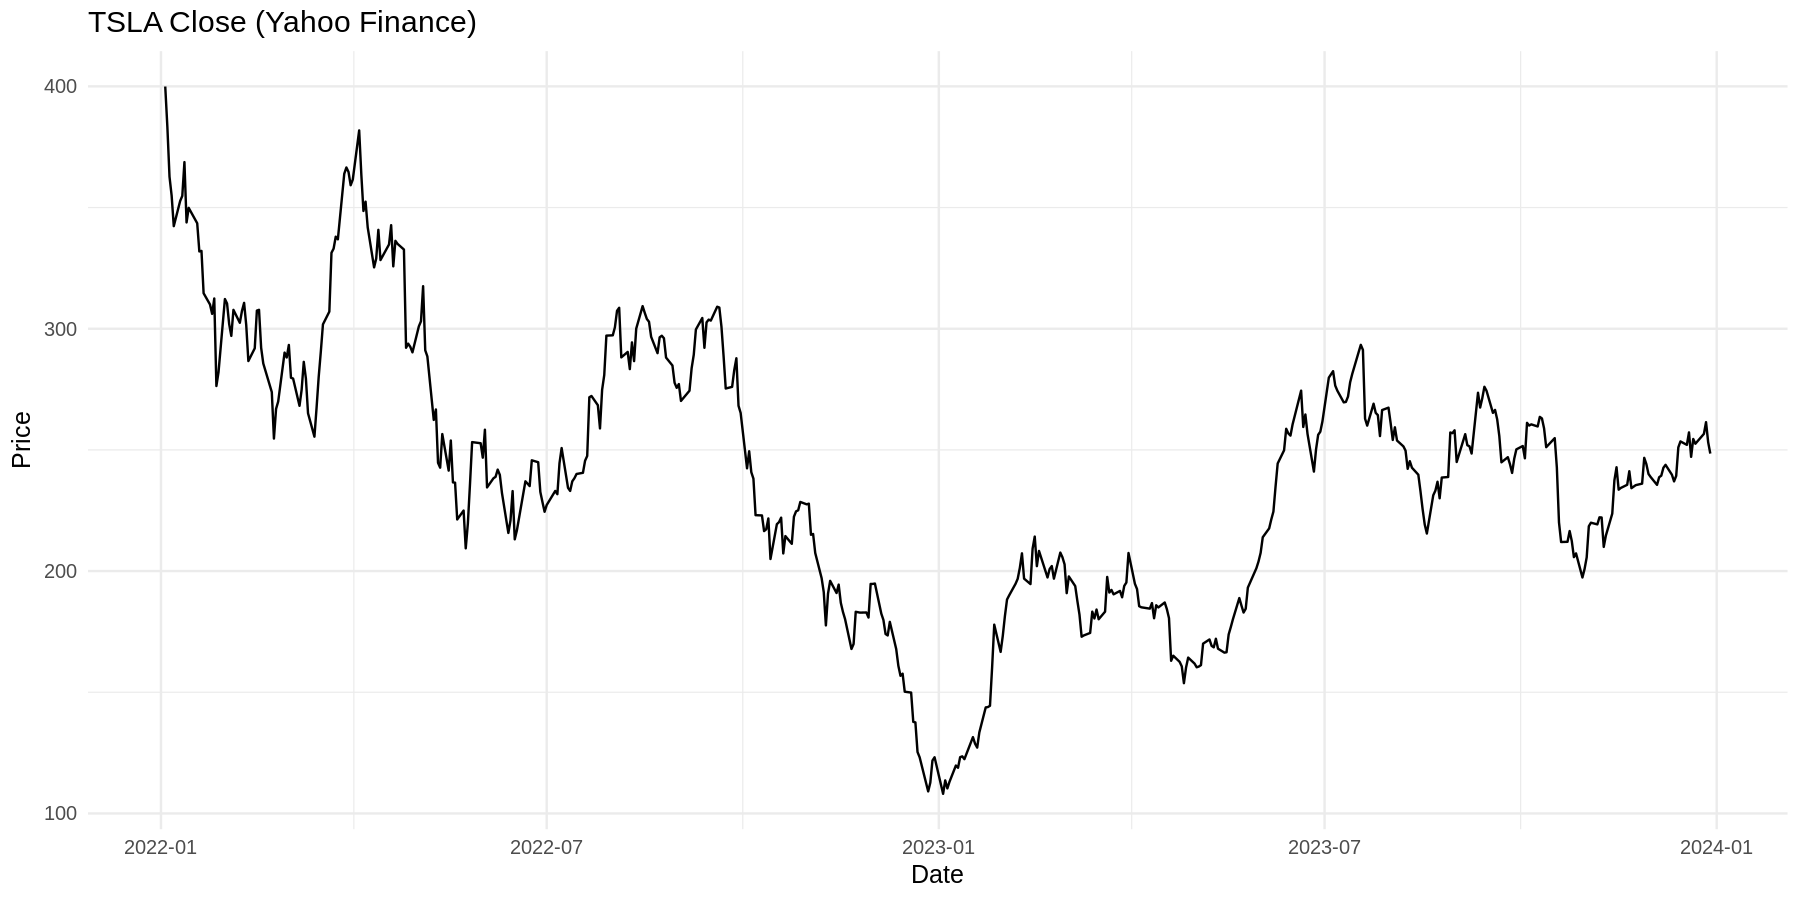

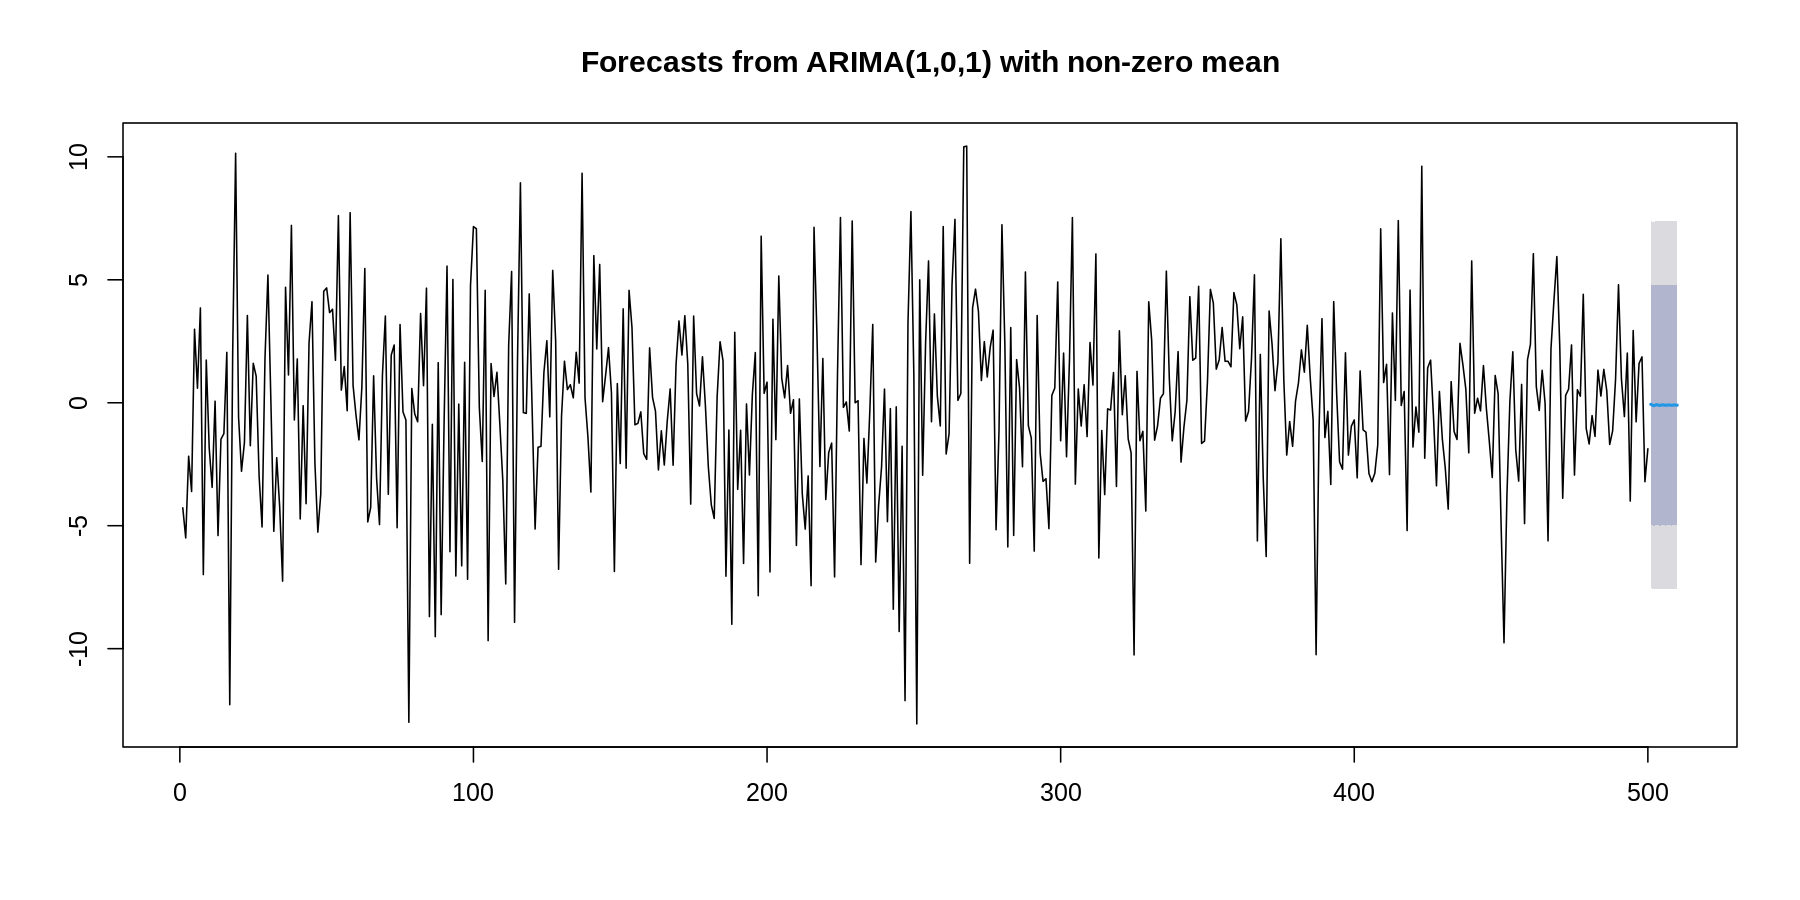

In [6]:
suppressWarnings({
  suppressMessages({
    getSymbols("TSLA", src = "yahoo", from = "2022-01-01", to = "2024-01-01", auto.assign = TRUE)
  })
})
tsla <- na.omit(Cl(TSLA))
autoplot(tsla) + ggtitle("TSLA Close (Yahoo Finance)") + xlab("Date") + ylab("Price")

# 간단 모델 예시 (ARMA(1,1) on returns)
ret <- diff(log(as.numeric(tsla))) * 100
fit_tsla <- forecast::Arima(na.omit(ret), order = c(1, 0, 1), method = "ML")
print(summary(fit_tsla))
plot(forecast::forecast(fit_tsla, h = 10))


## 4) 세션 정보


In [7]:
sessionInfo()


R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] quantmod_0.4.28 TTR_0.24.4      xts_0.14.1      zoo_1.8-14     
[5] tseries_0.10-58 urca_1.3-4      forecast_8.24.0 ggplot2_4.0.0  

loaded via a namespace (and not attached):